# Lab 1: Smarket Prediction

In [4]:
import pandas as pd

df = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)

## Describe the Data

In [5]:
df.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [6]:
df.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


## Create a Correlation Plot

<AxesSubplot:>

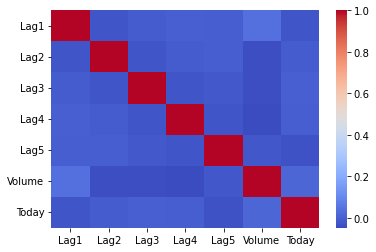

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig=plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm')

## Split the Data into Train and Test

Let the training data consist of all observations except 2005.  Let the test data consist of all 2005 observations.

In [8]:
X_train=df[:'2004'][['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_train=df[:'2004']['Direction']

X_test=df['2005':][['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
y_test=df['2005':]['Direction']

## Predict the Test Data with a KNN Model with K=1

Return the accuracy, a confusion matrix, and a classification report.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred))

0.5119047619047619
[[50 62]
 [61 79]]
              precision    recall  f1-score   support

        Down       0.45      0.45      0.45       111
          Up       0.56      0.56      0.56       141

    accuracy                           0.51       252
   macro avg       0.51      0.51      0.51       252
weighted avg       0.51      0.51      0.51       252



## Predict the Test Data with a KNN Model with K=3

Return the accuracy, a confusion matrix, and a classification report.

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred))

0.503968253968254
[[48 62]
 [63 79]]
              precision    recall  f1-score   support

        Down       0.44      0.43      0.43       111
          Up       0.56      0.56      0.56       141

    accuracy                           0.50       252
   macro avg       0.50      0.50      0.50       252
weighted avg       0.50      0.50      0.50       252



## Predict the Test Data with a KNN Model with K=5

Return the accuracy, a confusion matrix, and a classification report.

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
pred = knn.fit(X_train, y_train).predict(X_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred))

0.5
[[52 67]
 [59 74]]
              precision    recall  f1-score   support

        Down       0.44      0.47      0.45       111
          Up       0.56      0.52      0.54       141

    accuracy                           0.50       252
   macro avg       0.50      0.50      0.50       252
weighted avg       0.50      0.50      0.50       252



## Predict the Test Data with a Logistic Model

Return the accuracy, a confusion matrix, and a classification report.

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

In [14]:
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred))

0.48412698412698413
[[74 93]
 [37 48]]
              precision    recall  f1-score   support

        Down       0.44      0.67      0.53       111
          Up       0.56      0.34      0.42       141

    accuracy                           0.48       252
   macro avg       0.50      0.50      0.48       252
weighted avg       0.51      0.48      0.47       252



## Predict the Test Data with a Ridge Model

Return the accuracy, a confusion matrix, and a classification report.

In [15]:
from sklearn.linear_model import RidgeClassifier
Rid=RidgeClassifier()
pred = Rid.fit(X_train, y_train)
pred = Rid.predict(X_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred))

0.4801587301587302
[[77 97]
 [34 44]]
              precision    recall  f1-score   support

        Down       0.44      0.69      0.54       111
          Up       0.56      0.31      0.40       141

    accuracy                           0.48       252
   macro avg       0.50      0.50      0.47       252
weighted avg       0.51      0.48      0.46       252



## Predict the Test Data with a Lasso Model

Return the accuracy, a confusion matrix, and a classification report.

In [16]:
from sklearn.linear_model import SGDClassifier
Las=SGDClassifier(penalty='l1')
pred = Las.fit(X_train, y_train)
pred = Las.predict(X_test)

print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred))

0.5595238095238095
[[  0   0]
 [111 141]]
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00       111
          Up       0.56      1.00      0.72       141

    accuracy                           0.56       252
   macro avg       0.28      0.50      0.36       252
weighted avg       0.31      0.56      0.40       252



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualize Results

Present your test accuracy results in a bar chart.  Properly label your chart.

1. Use polynomial features or gaussian features (tough) to predict the test data set from the training data.

2. Change the response variable to Today, and fit 3 KNN models, linear regression, lasso, and ridge. Instead of looking at accuracy, look at RMSE.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [36]:
poly = PolynomialFeatures(5)
lr = LogisticRegression(max_iter=3000)

pipe = make_pipeline(poly,lr)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5793650793650794

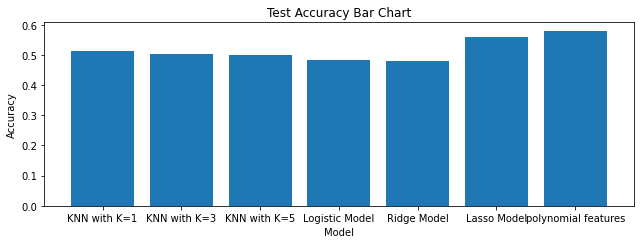

In [58]:
Model=['KNN with K=1','KNN with K=3','KNN with K=5','Logistic Model','Ridge Model','Lasso Model','polynomial features']
Accuracy=[0.512,0.504,0.5,0.484,0.48,0.56,0.5793]
plt.bar(Model, Accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Bar Chart')
plt.rcParams["figure.figsize"] = [9, 3.5]
plt.rcParams["figure.autolayout"] = True
plt.show()